In [7]:
# データを総合して解析を行う
import os
import pandas as pd
import numpy as np
import glob #フォルダ内の特定の拡張子のファイルを一括で読み込む

%matplotlib inline
import matplotlib.pyplot as plt
os.chdir("C:\\Users\\cocoa\\Documents\\実験\\BL-12C\\XANES_XAN_files")
print(os.getcwd())

import warnings#警告を非表示にする
warnings.filterwarnings('ignore')

C:\Users\cocoa\Documents\実験\BL-12C\XANES_XAN_files


In [8]:
"""フォルダ内のXANファイルをすべて読み込む"""
spectrum=[[],[],[]]
n,m = 1, 1

for filename in glob.glob("*.xan*"):
    p = pd.read_csv(filename)
    
    for i in range(len(p)):
        if p["[XAN_DATA]"][i]=="[BG_BEGIN]":
            n = i
        elif p["[XAN_DATA]"][i]=="[BG_END]":
            m = i
        else: continue
    
    data = pd.read_csv(filename,encoding="SHIFT_JIS",sep=('\t'),usecols=[1,2,3,4],names=[1,2,3,4],
                       skiprows=n+3)[1:m-n]
    spectrum[0].append(data[1])
    spectrum[1].append(data[2])
    spectrum[2].append(filename)


In [9]:
print("sample list")
for i in range(len(spectrum[2])):
    print(str(i)+"  "+spectrum[2][i])

sample list
0  ammonium_oxalate_Fe_dat.xan
1  biotite_dat.xan
2  copepoda_Oarai_frozen.xan
3  Fe3O4_dat.xan
4  FeC2O4_2H2O_dat.xan
5  ferrihydrite_dat.xan
6  ferritin_EX_long_dat.xan
7  FeS_dat.xan
8  goethite_dat.xan
9  hematite_dat.xan
10  hemoglobin_dat.xan
11  J_flying_squid-A_frozen_liver.xan
12  J_sardine-B_frozen_muscle.xan
13  J_sardine-C_frozen_muscle.xan
14  krill_sanriku_frozen.xan
15  mache_dry_liver.xan
16  mache_frozen_heart.xan
17  mache_frozen_liver.xan
18  mache_frozen_muscle.xan
19  marcasite_dat.xan
20  MKR_02_liver_sdd.xan
21  MKR_02_ovary.xan
22  MKR_02_Red_muscle-3.xan
23  MKR_02_Red_muscle_0_s.xan
24  MKR_02_red_muscle_sdd.xan
25  MKR_02_White_muscle_3.xan
26  MKR_02_white_muscle_step.xan
27  MKR_04_liver_sdd.xan
28  MKR_04_ovary.xan
29  MKR_04_Red_Muscle.xan
30  MKR_04_red_muscle_sdd.xan
31  MKR_04_White_muscle.xan
32  MKR_06_blood_sdd.xan
33  MKR_06_heart.xan
34  MKR_06_liver_sdd.xan
35  MKR_06_red_muscle_sdd.xan
36  MKR_06_Teste.xan
37  MKR_06_white_muscle_sdd

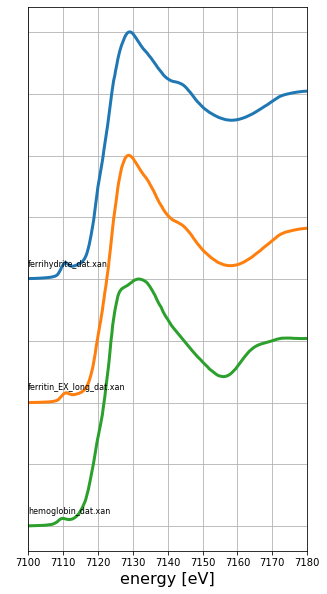

In [76]:
'改良版：高さをそろえたもの'
sample = [5,6,10] 
sample2 = [1,0,3,4,5,6,8,9,10,7] 
sample1 = [22,29,35,40,45, 20,27,34,39,44, 21,28,36,46] 

fig = plt.figure(figsize=(5,10))
ax = fig.add_subplot(111)
ax.set_xlabel("energy [eV]",fontsize=16)
ax.set_ylabel(" ")
ax.axes.yaxis.set_ticklabels([])
ax.set_xlim(7100, 7180)
ax.grid()
ax.tick_params(left=False)

for n in range(len(sample)):
    energy = [float(i) for i in spectrum[0][sample[n]]]
    line = spectrum[1][sample[n]] 
    top=[i for i, v in enumerate(line) if v == max(line)]
    top_num = spectrum[1][sample[n]][top[0]] # 高さをそろえるための処理
    line = line/top_num - n/2
    ax.plot(energy,line,linewidth = 3, label=spectrum[2][sample[n]])
    ax.annotate(spectrum[2][sample[n]], xy=(7100,line[1]+0.05), size=8)



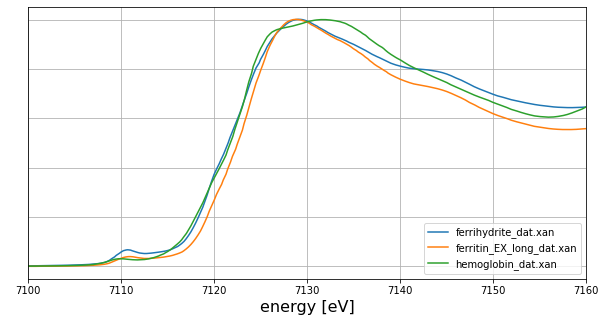

In [77]:

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_xlabel("energy [eV]",fontsize=16)
ax.set_ylabel(" ")
ax.axes.yaxis.set_ticklabels([])
ax.set_xlim(7100, 7160)
ax.grid()
ax.tick_params(left=False)

for n in range(len(sample)):
    energy = [float(i) for i in spectrum[0][sample[n]]]
    line = spectrum[1][sample[n]] 
    top=[i for i, v in enumerate(line) if v == max(line)]
    top_num = spectrum[1][sample[n]][top[0]] # 高さをそろえるための処理
    ax.plot(energy,line/top_num,linewidth = 1.5, label=spectrum[2][sample[n]])

ax.legend(bbox_to_anchor = [1,0],loc="lower right")
    


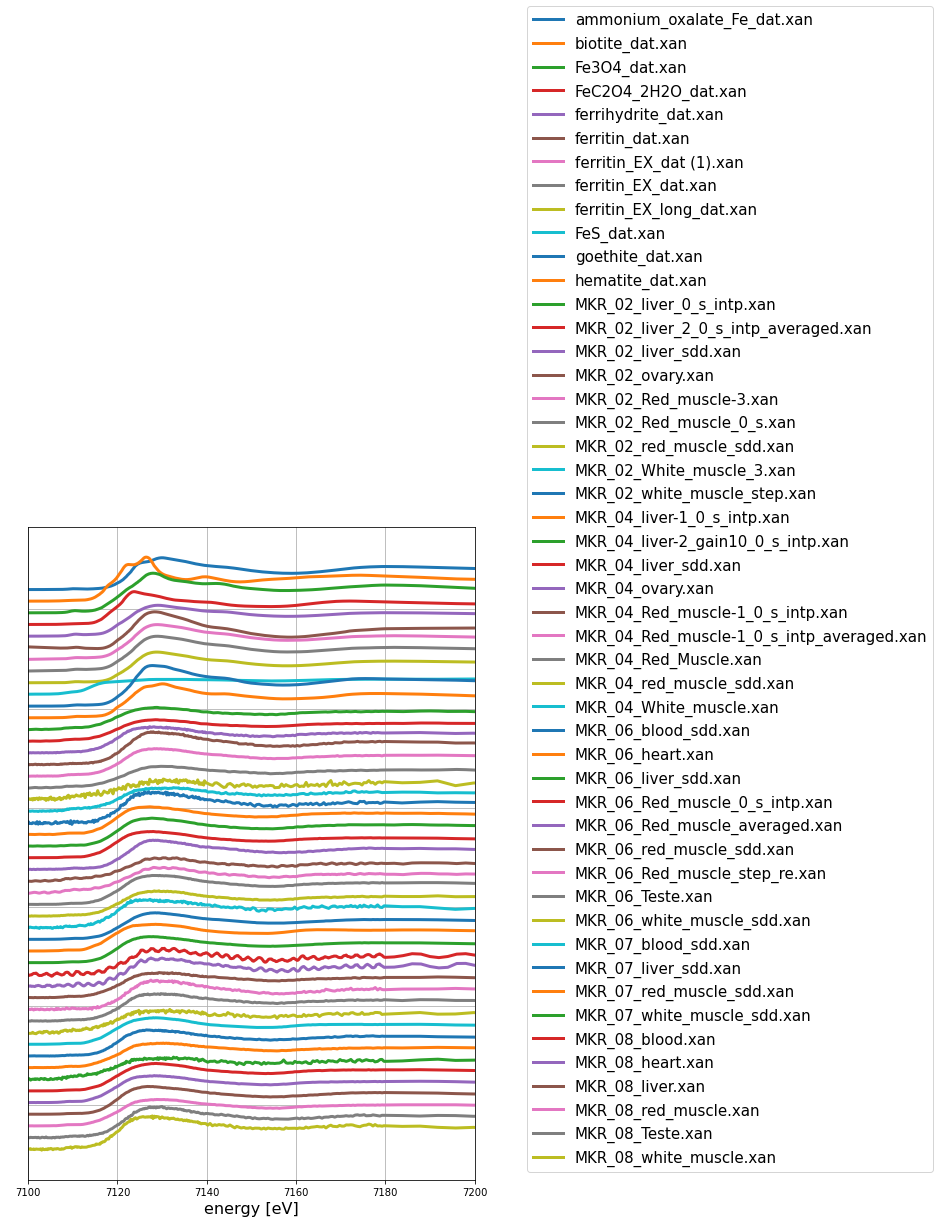

In [6]:
#全部描画
fig = plt.figure(figsize=(8,12))
ax = fig.add_subplot(111)
ax.set_xlabel("energy [eV]",fontsize=16)
ax.set_ylabel(" ")
ax.axes.yaxis.set_ticklabels([])
ax.set_xlim(7100, 7200)
ax.grid()
ax.tick_params(left=False)

for n in range(len(spectrum[2])):
    energy = [float(i) for i in spectrum[0][n]]
    line = spectrum[1][n] + 1 - n/1.7 
    ax.plot(energy,line,linewidth = 3, label=spectrum[2][n])
ax.legend(bbox_to_anchor=(1.1, 0),loc="lower left", fontsize=15)
plt.rcParams["font.size"] = 20

In [15]:
#ピークトップのエネルギー
for n in range(len(spectrum[1])):
    l=spectrum[1][n]
    top=[i for i, v in enumerate(l) if v == max(l)]
    print(spectrum[2][n])
    print(spectrum[1][n][top[0]])
    print("==================")
    

ammonium_oxalate_Fe_dat.xan
1.60530616
biotite_dat.xan
2.2210894
copepoda_Oarai_frozen.xan
1.31014233
Fe3O4_dat.xan
2.00215259
FeC2O4_2H2O_dat.xan
1.65493763
ferrihydrite_dat.xan
1.55949342
ferritin_EX_long_dat.xan
1.55158008
FeS_dat.xan
1.01054737
goethite_dat.xan
2.04754054
hematite_dat.xan
1.71425919
hemoglobin_dat.xan
1.40772405
J_flying_squid-A_frozen_liver.xan
1.45491682
J_sardine-B_frozen_muscle.xan
1.30964722
J_sardine-C_frozen_muscle.xan
1.18091465
krill_sanriku_frozen.xan
1.50089709
mache_dry_liver.xan
1.35178204
mache_frozen_heart.xan
1.35436343
mache_frozen_liver.xan
1.32348983
mache_frozen_muscle.xan
1.40819606
marcasite_dat.xan
1.26495676
MKR_02_liver_sdd.xan
1.2911941
MKR_02_ovary.xan
1.61546668
MKR_02_Red_muscle-3.xan
1.37617149
MKR_02_Red_muscle_0_s.xan
1.76982883
MKR_02_red_muscle_sdd.xan
0.98349459
MKR_02_White_muscle_3.xan
1.15170235
MKR_02_white_muscle_step.xan
1.4924287
MKR_04_liver_sdd.xan
1.31745371
MKR_04_ovary.xan
1.46833568
MKR_04_Red_Muscle.xan
1.45917821
MK